# Heart disease prediction 

#### 1] Importing Libraries

In [1]:
#data wrangling and data pre processing
import pandas as pd 
import numpy as np

#data visuallization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

#### 2] Loading dataset

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### 3] Data cleaning and Data pre processing

In [5]:
#converting categorical into numerical
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
data["Sex"] = le.fit_transform(data["Sex"])

In [8]:
data["ChestPainType"] = le.fit_transform(data["ChestPainType"])

In [9]:
data["RestingECG"] = le.fit_transform(data["RestingECG"])

In [10]:
data["ExerciseAngina"] = le.fit_transform(data["ExerciseAngina"])

In [11]:
data["ST_Slope"] = le.fit_transform(data["ST_Slope"])

In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [13]:
data["ChestPainType"].value_counts()
# 0 = ASY
# 1 = ATA
# 2 = NAP
# 3 = TA

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [14]:
data["RestingECG"].value_counts()
# 0 = LVH
# 1 = normal
# 2 = ST

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [15]:
data["ST_Slope"].value_counts()
# 0 = down
# 1 = flat
# 2 = up 

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

In [16]:
data["HeartDisease"].value_counts()
# 1 who has heart disease
# 0 who don't

1    508
0    410
Name: HeartDisease, dtype: int64

In [17]:
#checking missing entries
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 4] Exploratory data analysis

In [18]:
data.shape

(918, 12)

In [19]:
#summary statistics
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


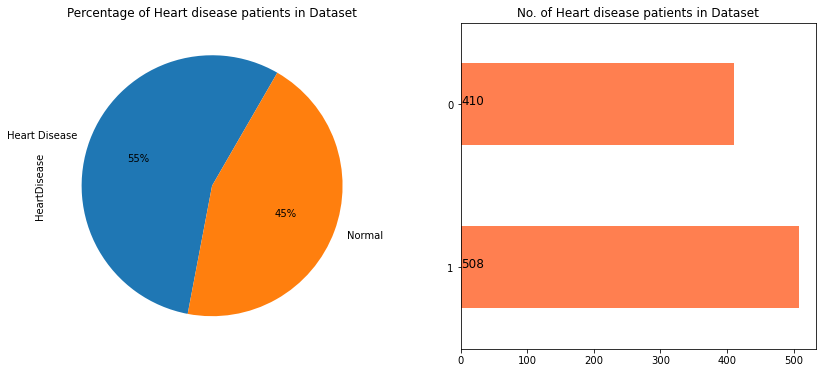

In [20]:
# distribution of heart disease
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))
ax1 = data['HeartDisease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data["HeartDisease"].value_counts().plot(kind="barh" ,ax =ax2, color="coral")
for i,j in enumerate(data["HeartDisease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


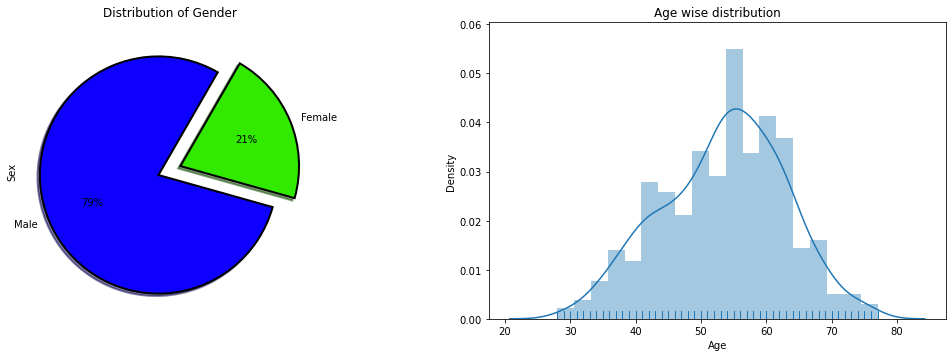

In [21]:
# cheking gender and age wise distribution
plt.figure(figsize=(18,12))
plt.subplot(221)
data["Sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(data['Age'], rug=True)
plt.title("Age wise distribution")
plt.show()





C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


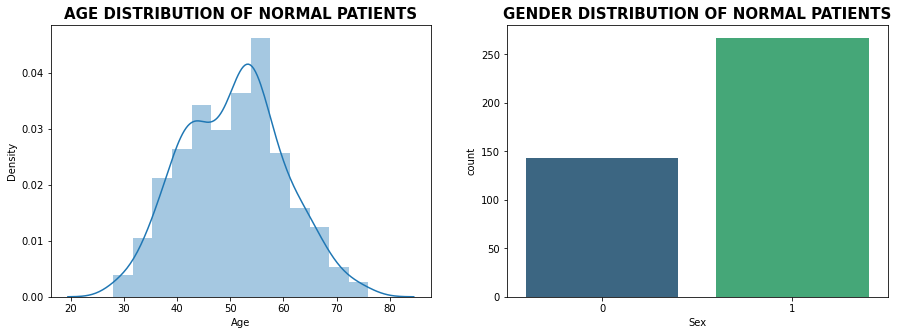

In [22]:
attr_1=data[data['HeartDisease']==1]

attr_0=data[data['HeartDisease']==0]

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


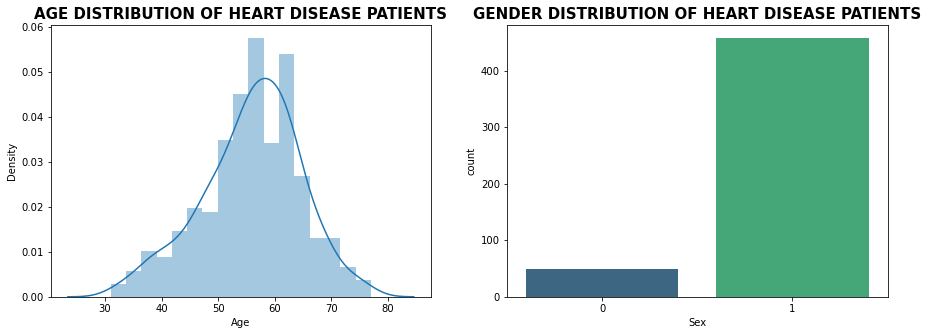

In [23]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


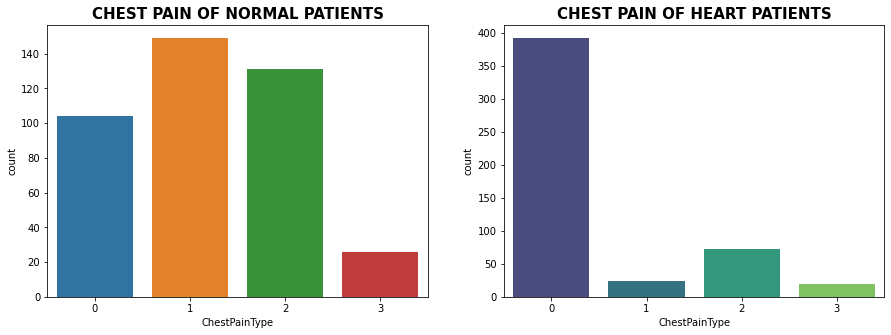

In [24]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['ChestPainType'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['ChestPainType'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


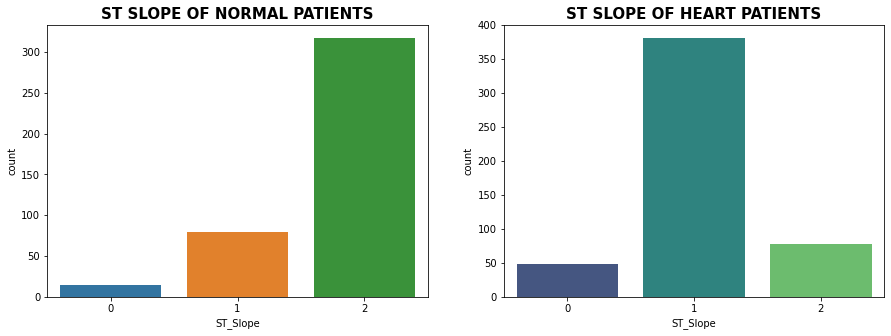

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['ST_Slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['ST_Slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()


In [26]:
x = data.drop(columns='HeartDisease', axis=1)
y = data['HeartDisease']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,  , test_size=0.2,shuffle=True, random_state=5)

In [28]:
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    406
0    328
Name: HeartDisease, dtype: int64
Distribution of traget variable in test set
1    102
0     82
Name: HeartDisease, dtype: int64


In [29]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(734, 11)
(734,)
------------Test Set------------------
(184, 11)
(184,)


In [30]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [31]:
clf1=LogisticRegression(random_state=1)

In [32]:
clf2=RandomForestClassifier(random_state=1)


In [33]:
clf3=DecisionTreeClassifier(random_state=1)

In [34]:
from sklearn.svm import SVC
clf4= SVC(random_state=1)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier()

In [37]:
from sklearn import model_selection
labels=['LogisticRegression','RandomForest','DecisionTree',"SVM","KNN"]
for clf,label in zip([clf1,clf2,clf3,clf4,clf5],labels):
    scores=model_selection.cross_val_score(clf,x,y,cv=5,scoring="accuracy")
    print("Accuracy:%0.2f(+/-%0.2f)[%s]"%(scores.mean(),scores.std(),label))
    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy:0.81(+/-0.02)[LogisticRegression]
Accuracy:0.83(+/-0.04)[RandomForest]
Accuracy:0.75(+/-0.04)[DecisionTree]
Accuracy:0.68(+/-0.07)[SVM]
Accuracy:0.66(+/-0.05)[KNN]
